# DEEP LEARNING WITH PYTHON
## _FROM TABULAR TO MULTIMEDIA_

### UniFr Winter School in Data Analytics & Machine Learning
Fribourg, 14-16 February 2024

with [Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Setup
--> "Runtime" --> "Change runtime type" --> "GPU" hardware accelerator

## Installs

In [ ]:
! pip install -qU tensorflow_datasets

## Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as random

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical

import tensorflow_datasets as tfds

# Eurostat Data

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/lan_lcv_ovw/default/table?lang=en" width="1000" height="600"></iframe>

# EuroSAT Dataset
https://www.tensorflow.org/datasets/catalog/eurosat

## Download Data

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling eurosat/rgb/2.0.0.incompleteMIWPHN/eurosat-train.tfrecord*...:   0%|          | 0/27000 [00:00<?, ? …

Dataset eurosat downloaded and prepared to ./eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


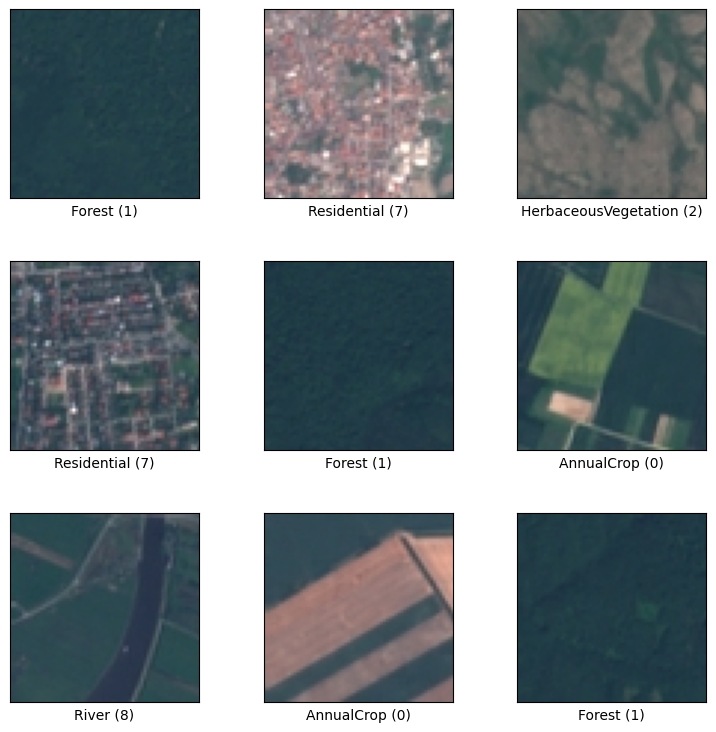

In [ ]:
ds, ds_info = tfds.load('eurosat/rgb',
                        with_info=True,
                        split='train',
                        data_dir='.')

tfds.show_examples(ds, ds_info);

In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir=PosixGPath('/tmp/tmpe1ff35mjtfds'),
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('ima

## Load into Pandas

In [ ]:
%%time
df = tfds.as_dataframe(ds, ds_info)
print(df.shape)

(27000, 3)
CPU times: user 17.2 s, sys: 1.9 s, total: 19.1 s
Wall time: 20.9 s


In [ ]:
df.sample(10)

filename  \
20454  b'HerbaceousVegetation_1192.jpg'   
7435             b'Residential_102.jpg'   
10010           b'Residential_1710.jpg'   
11140          b'PermanentCrop_881.jpg'   
21552                b'Forest_1691.jpg'   
20167         b'PermanentCrop_1587.jpg'   
4978                 b'SeaLake_434.jpg'   
8972                   b'SeaLake_1.jpg'   
1797                b'SeaLake_2355.jpg'   
7868            b'Residential_1910.jpg'   

                                                   image  label  
20454  [[[88, 94, 92], [88, 94, 92], [95, 101, 101], ...      2  
7435   [[[47, 82, 84], [51, 82, 87], [49, 73, 83], [4...      7  
10010  [[[74, 90, 103], [73, 91, 103], [71, 91, 100],...      7  
11140  [[[104, 99, 96], [104, 98, 98], [104, 100, 101...      6  
21552  [[[35, 55, 64], [34, 54, 63], [35, 53, 63], [3...      1  
20167  [[[212, 183, 167], [212, 183, 165], [238, 206,...      6  
4978   [[[23, 44, 73], [23, 44, 73], [23, 44, 75], [2...      9  
8972   [[[24, 42, 66], [24, 42, 66], [24, 41, 69], [2...      9  
1797   [[[31, 56, 76], [30, 55, 75], [31, 56, 78], [3...      9  
7868   [[[91, 93, 106], [96, 95, 109], [88, 85, 104],...      7

## Target Distribution

In [ ]:
df.groupby('label')['label'].value_counts()

label  label
0      0        3000
1      1        3000
2      2        3000
3      3        2500
4      4        2500
5      5        2000
6      6        2500
7      7        3000
8      8        2500
9      9        3000
Name: label, dtype: int64

## Image Dimensions

In [ ]:
df['image'][0].shape

(64, 64, 3)

In [ ]:
np.stack(df['image'].values).shape

(27000, 64, 64, 3)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.stack(df['image'].values),
                                                    np.stack(df['label'].values),
                                                    test_size=0.333333,
                                                    shuffle=True,
                                                    random_state=10)
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (18000, 64, 64, 3) (18000,)
Test:  (9000, 64, 64, 3) (9000,)


## OneHot Encode the Label

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print(y_train.shape, y_test.shape)
print(y_train[:4])

(18000, 10) (9000, 10)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# MLP

## Reshape & Scale

In [ ]:
num_pixels = int(np.prod(X_train.shape[1:]))
X_train_mlp = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') / 255
X_test_mlp = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') / 255

print('Train: ', X_train_mlp.shape, y_train.shape)
print('Test: ', X_test_mlp.shape, y_test.shape)

Train:  (18000, 12288) (18000, 10)
Test:  (9000, 12288) (9000, 10)


## Build Model

In [ ]:
def mlp_model():
  model = keras.Sequential([
   layers.Dense(128,
                input_dim=num_pixels,
                kernel_initializer='normal',
                activation='relu'),
    layers.Dense(num_classes,
                 kernel_initializer='normal',
                 activation='softmax')])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = mlp_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1574282 (6.01 MB)
Trainable params: 1574282 (6.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


❓ What do you think of this approach?

# Custom CNN

## Build Model

In [ ]:
def cnn():
  model = keras.Sequential([
    layers.BatchNormalization(input_shape=X_train[0].shape, name='norm_1'),
    layers.Conv2D(16, (5, 5), padding='same', activation='relu', name='conv_1'),
    layers.MaxPool2D(name='pool_1'),

    layers.BatchNormalization(name='norm_2'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv_2_a'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv_2_b'),
    layers.MaxPool2D(name='pool_2'),

    layers.BatchNormalization(name='norm_3'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv_3_a'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv_3_b'),
    layers.MaxPool2D(name='pool_3'),

    layers.Flatten(name='flatten'),
    layers.Dense(128, activation='relu', name='dense_1'),
    layers.Dropout(0.5, name='drop_1'),
    layers.Dense(64, activation='relu', name='dense_2'),
    layers.Dropout(0.5, name='drop_2'),
    layers.Dense(10, activation='softmax', name='output')])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = cnn()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 norm_1 (BatchNormalization  (None, 64, 64, 3)         12        
 )                                                               
                                                                 
 conv_1 (Conv2D)             (None, 64, 64, 16)        1216      
                                                                 
 pool_1 (MaxPooling2D)       (None, 32, 32, 16)        0         
                                                                 
 norm_2 (BatchNormalization  (None, 32, 32, 16)        64        
 )                                                               
                                                                 
 conv_2_a (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv_2_b (Conv2D)           (None, 32, 32, 32)       

❓ What do you think of this approach?

## Train Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.stack(df['image'].values),
                                                    np.stack(df['label'].values),
                                                    test_size=0.333333,
                                                    shuffle=True,
                                                    random_state=10)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (18000, 64, 64, 3) (18000, 10)
Test:  (9000, 64, 64, 3) (9000, 10)


In [ ]:
%%time
model = cnn()

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=512,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
30/30 [==============================] - 16s 189ms/step - loss: 1.9756 - accuracy: 0.2710 - val_loss: 2.4971 - val_accuracy: 0.0967
Epoch 2/100
30/30 [==============================] - 2s 66ms/step - loss: 1.4385 - accuracy: 0.4786 - val_loss: 3.4059 - val_accuracy: 0.1059
Epoch 3/100
30/30 [==============================] - 2s 67ms/step - loss: 1.1591 - accuracy: 0.6019 - val_loss: 2.4015 - val_accuracy: 0.2141
Epoch 4/100
30/30 [==============================] - 2s 66ms/step - loss: 0.9951 - accuracy: 0.6639 - val_loss: 2.3293 - val_accuracy: 0.2926
Epoch 5/100
30/30 [==============================] - 2s 64ms/step - loss: 0.8731 - accuracy: 0.7084 - val_loss: 1.7556 - val_accuracy: 0.3963
Epoch 6/100
30/30 [==============================] - 2s 64ms/step - loss: 0.8664 - accuracy: 0.7191 - val_loss: 1.3884 - val_accuracy: 0.5348
Epoch 7/100
30/30 [==============================] - 2s 67ms/step - loss: 0.7453 - accuracy: 0.7558 - val_loss: 1.1417 - val_accuracy: 0.6256
Epoc

## Evaluate Model Performance

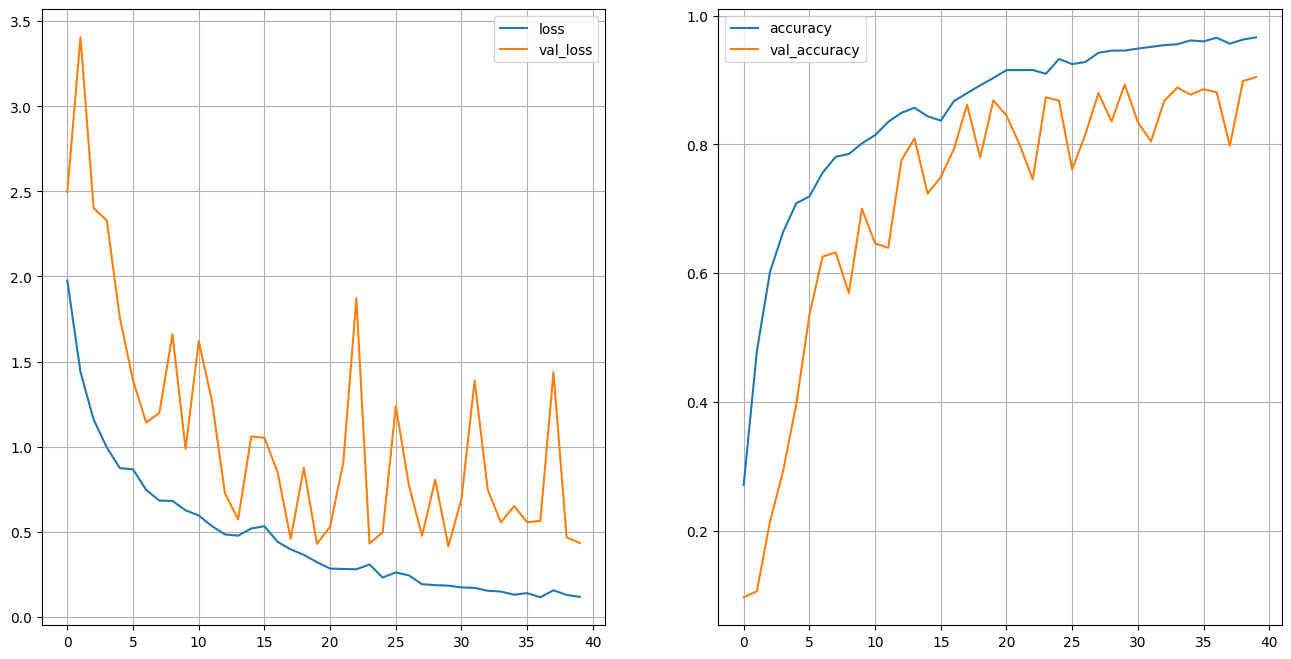

CNN Error: 10.36%


In [ ]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

## Analyse Failures

1/1 [==============================] - 0s 30ms/step


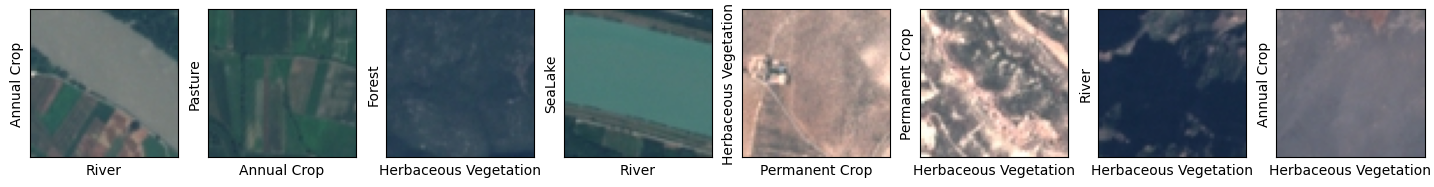

In [ ]:
labels = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'SeaLake']

N = 8
fig, ax = plt.subplots(1, N, figsize=(18, 4))
predictions = []
while len(predictions) < N:
  i = random.randint(0, X_test.shape[0])
  if (np.argmax(model.predict(X_test[i].reshape(1, *X_test[i].shape))) != np.argmax(y_test[i])):
    predictions.append(np.argmax(model.predict(X_test[i].reshape(1, *X_test[i].shape))))
    ax[len(predictions)-1].imshow(X_test[i])

    ax[len(predictions)-1].set_xlabel(labels[np.argmax(y_test[i])])
    ax[len(predictions)-1].set_xticks([])

    ax[len(predictions)-1].set_ylabel(labels[predictions[-1]])
    ax[len(predictions)-1].set_yticks([])
plt.show()

# Image Augmentation 🪄

 Image augmentation is a technique used to **artificially expand your dataset by applying various transformations** (like rotation, zoom, flip, etc.) to your existing images. This can help improve the robustness and generalization of your model.

 - Keras has some [tricks](https://keras.io/api/layers/preprocessing_layers/image_augmentation/) up its sleeves
- [imaug-tf](https://github.com/hirune924/imgaug-tf])
- [tf.keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
    rotation_range=20,  # Degree range for random rotations
    width_shift_range=0.2,  # Range (as a fraction of total width) for horizontal shifts
    height_shift_range=0.2,  # Range (as a fraction of total height) for vertical shifts
    shear_range=0.15,  # Shear intensity (shear angle in counter-clockwise direction)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    fill_mode='nearest'  # Strategy to fill newly created pixels
)

augmentation.fit(X_train) # necessary to augment the data

In [ ]:
%%time
model = cnn()

X_train_aug, X_val, y_train_aug, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    augmentation.flow(X_train_aug, y_train_aug, batch_size=512), # new line
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=512,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
30/30 [==============================] - 24s 652ms/step - loss: 1.9809 - accuracy: 0.2826 - val_loss: 2.8814 - val_accuracy: 0.0967
Epoch 2/100
30/30 [==============================] - 21s 697ms/step - loss: 1.5165 - accuracy: 0.4597 - val_loss: 2.5571 - val_accuracy: 0.1433
Epoch 3/100
30/30 [==============================] - 22s 722ms/step - loss: 1.2681 - accuracy: 0.5661 - val_loss: 1.9999 - val_accuracy: 0.2819
Epoch 4/100
30/30 [==============================] - 20s 674ms/step - loss: 1.1132 - accuracy: 0.6308 - val_loss: 2.0469 - val_accuracy: 0.2952
Epoch 5/100
30/30 [==============================] - 22s 741ms/step - loss: 0.9918 - accuracy: 0.6768 - val_loss: 2.1939 - val_accuracy: 0.2941
Epoch 6/100
30/30 [==============================] - 21s 697ms/step - loss: 0.9310 - accuracy: 0.6984 - val_loss: 1.7550 - val_accuracy: 0.4378
Epoch 7/100
30/30 [==============================] - 20s 682ms/step - loss: 0.8895 - accuracy: 0.7136 - val_loss: 1.8972 - val_accuracy:

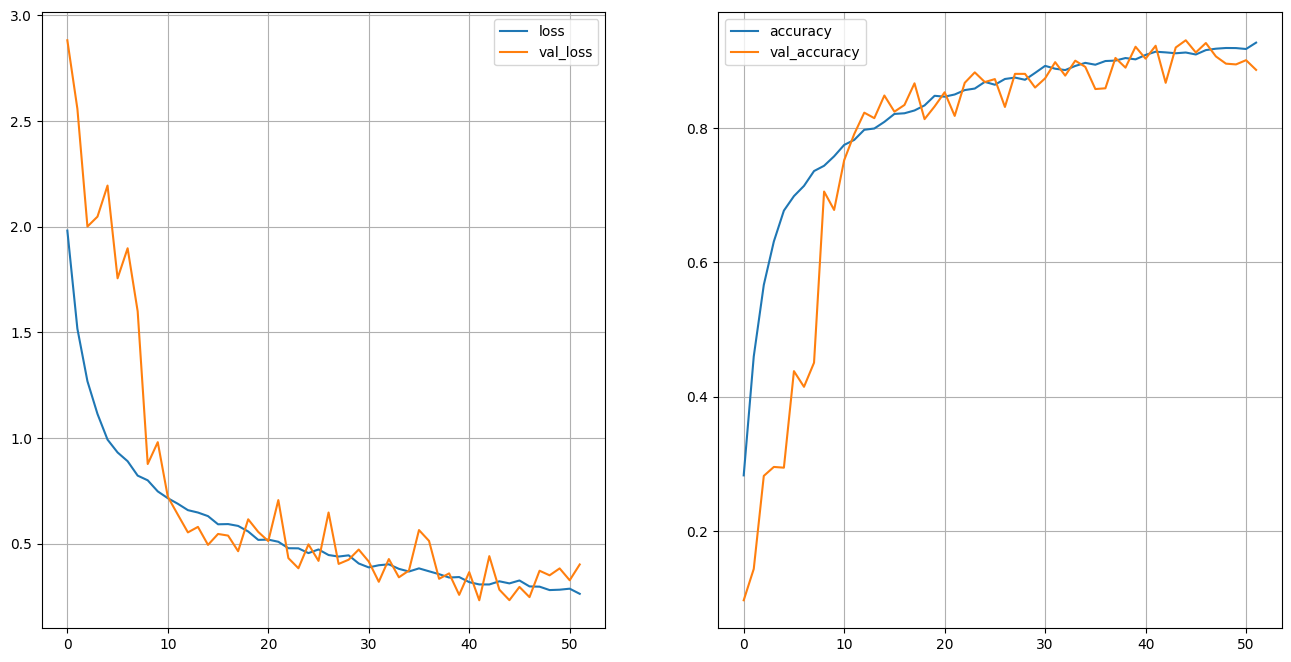

CNN Error: 7.83%


In [ ]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# ❓ Your CNN

Write your own CNN architecture and train it on the dataset...

What test error can you reach?

# Deployment with Gradio

In [ ]:
!pip install -qq gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into accoun

In [ ]:
import gradio as gr
import numpy as np
from keras.applications.resnet import preprocess_input
from tensorflow import keras
from PIL import Image
import os

labels = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'SeaLake']
os.makedirs('satellite_classifier', exist_ok=True)
for i in range(20):
  im = Image.fromarray(df['image'].sample(1).values[0])
  im.save(f"satellite_classifier/example{str(i).zfill(2)}.png")


def classify_image(img):
  img = img.reshape((-1, 64, 64, 3))
  prediction = model.predict(img)[0]
  confidences = {labels[i]: float(prediction[i]) for i in range(10)}
  return confidences

demo = gr.Interface(fn=classify_image,
                    inputs=gr.Image(width=400,
                                    height=400),
                    outputs=gr.Label(num_top_classes=3),
                    examples=[f"satellite_classifier/example{str(i).zfill(2)}.png" for i in range(20)])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8c9d4d7bdff3dd2b62.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# UP NEXT
[Transfer Learning](https://colab.research.google.com/drive/1CJH49DceQGxaurzUDJnHc2jo0CUIakgQ?usp=sharing)